# IEEE Coders Week
### Day 2 : Classification (Supervised Learning)
#### By : Fahmi Jabbar (rootmawar77@gmail.com)
---
**Disclaimer**

All of the work result below is done by me, based on every resources that have been given. Please contact me if you have any good suggestion.


# Data Preparation & Pre-Processing

In [1]:
#@title Import Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Import dataset from corresponding URL
!wget --no-check-certificate \
http://iali.in/datasets/Social_Network_Ads.csv \
  -O /content/SNA.csv

--2020-06-02 14:46:56--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘/content/SNA.csv’

/content/SNA.csv    100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 14:46:56 (171 MB/s) - ‘/content/SNA.csv’ saved [10926/10926]



In [3]:
#@title Dataset Information
print("Visualizing the table")
df = pd.read_csv('/content/SNA.csv')
df.head()

Visualizing the table


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


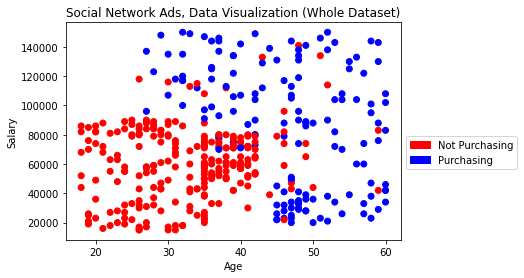

In [6]:
#@title Visualizing Dataset. Based on Purchase decision
look_salary = df['EstimatedSalary'].to_numpy()
look_age = df['Age'].to_numpy()
 
color = np.where(df["Purchased"]== 1,'b','r')
plt.title('Social Network Ads, Data Visualization (Whole Dataset)')
plt.scatter(look_age, look_salary, c=color)
red_patch = mpatches.Patch(color='red', label='Not Purchasing')
blue_patch = mpatches.Patch(color='blue', label='Purchasing')
plt.legend(handles=[red_patch, blue_patch], bbox_to_anchor=(1, 0.5))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [0]:
#@title Split data to Training set & Validation set

X = df.iloc[:, [2, 3]].values #select age and salary
Y = df.iloc[:,4].values #select purchased
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating Model & Result

In [8]:
#@title Training Model, Decission Tree Methods
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
#@title Comparison between prediction on test set and test set 
y_pred = model.predict(X_test)
y_pred, y_test

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]))

In [10]:
#@title Result Details
# Conclude that 0 is Not Purchased and 1 is vice versa
labels = ["Not Purchased", "Purhased"]

report = classification_report(y_test, y_pred, target_names=labels)
print(report)

               precision    recall  f1-score   support

Not Purchased       0.95      0.91      0.93        58
     Purhased       0.79      0.86      0.83        22

     accuracy                           0.90        80
    macro avg       0.87      0.89      0.88        80
 weighted avg       0.90      0.90      0.90        80



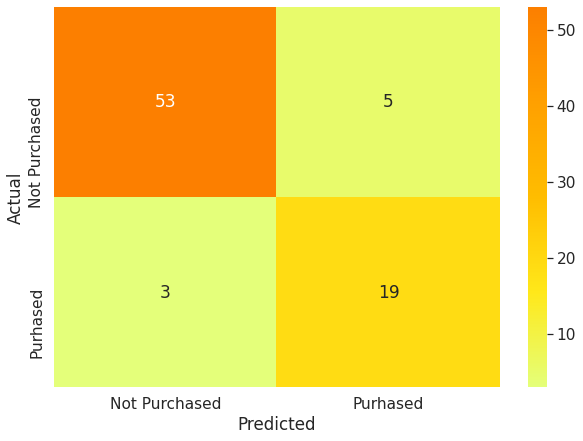

In [11]:
#@title Confusion Matrix Visualization


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


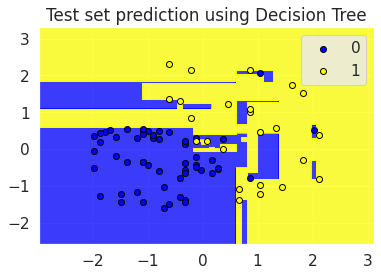

Correct answer (by model) = 72
Incorrect answer (by model) = 8
Decission Tree accuracy: 90.0 %


In [12]:
#@title Result Visualization
cm = confusion_matrix(y_pred, y_test)
correct_answer = cm[0][0] + cm [1][1]
incorrect_answer = cm[0][1] + cm[1][0]

X_set, Y_set = X_test, y_pred
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('blue', 'yellow'))(i), label = j, linewidths = 1, edgecolor = 'black')
plt.title('Test set prediction using Decision Tree')
plt.legend()
plt.show()

print("Correct answer (by model) = " + str(correct_answer))
print("Incorrect answer (by model) = " + str(incorrect_answer))
print('Decission Tree accuracy:', accuracy_score(y_test, y_pred)*100 ,"%")